## Regresja logistyczna
### 1. Wstęp

Regresja logistyczna to technika statystyczna używana do przewidywania zmiennej zależnej o charakterze binarnym, czyli takiej, która przyjmuje tylko dwie wartości — np. tak/nie, 0/1, pozytywne/negatywne.

### 1.1 Przykład Regresji logistycznej

Dane w pliku to id, płeć, zarobki, wiek, oraz zmienna zależna: dokona zakupu czy nie (0/1)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000       

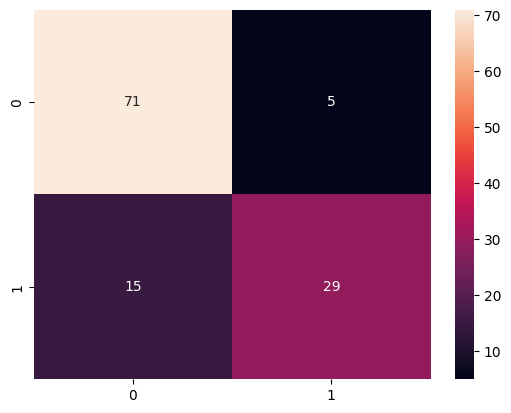

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

dane = pd.read_csv('PurchasesByGender.csv')

print(dane.head())
print(dane.info())

dane['Gender'] = dane['Gender'].map(lambda x: 1 if x == "Male" else 0)

print(dane.head())

X = np.array(dane[["Gender","Age","EstimatedSalary"]])
y = np.array(dane["Purchased"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred)) # TN, FP, FN, TP

sn.heatmap(confusion_matrix(y_test, y_pred),annot=True)
           
plt.show()

### 1.2. Testowanie aplikacji na danych zewnętrznych

In [ ]:
#przykładowe dane
gender, age, salary = [1, 30, 50000]  

X_input = np.array([gender, age, salary]).reshape(1, -1)
print(model.predict(X_input))

[1]
